In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 5)
%matplotlib inline
#plt.rcParams['i']

In [3]:
data = loadmat('ex3data1.mat')
X = data['X']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y = data['y']
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [5]:
m, n = X.shape
m

5000

In [6]:
def randomDigit():
    return X[np.random.randint(m)]

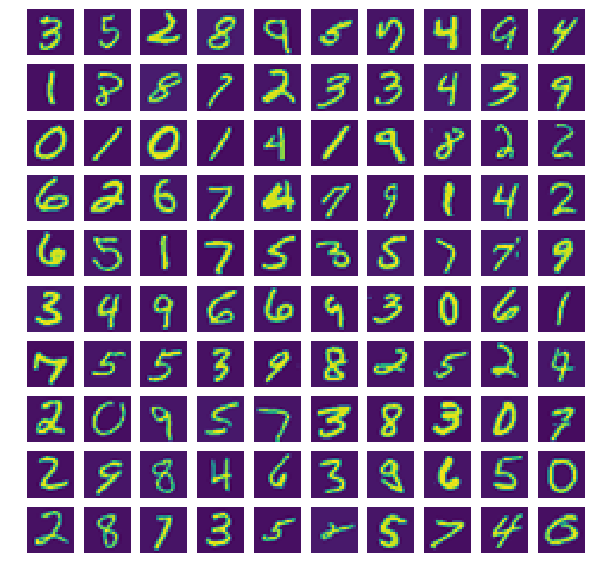

In [7]:
FIG_SIZE = 10
IMG_SIZE = 20
_, axarr = plt.subplots(FIG_SIZE, FIG_SIZE, figsize=(FIG_SIZE, FIG_SIZE))
for i in range(FIG_SIZE):
    for j in range(FIG_SIZE):
        axarr[i, j].imshow(randomDigit().reshape((IMG_SIZE, IMG_SIZE),
                                                   order='F'))
        axarr[i, j].axis('off')

In [8]:
weights_data = loadmat('ex3weights.mat')
theta1, theta2 = weights_data['Theta1'], weights_data['Theta2']
print(f'Theta1 shape {theta1.shape}, Theta2 shape: {theta2.shape}')

Theta1 shape (25, 401), Theta2 shape: (10, 26)


In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [25]:
lmbda = 1
ones = np.ones((m, 1))
a1 = np.hstack((ones, X))
a2 = sigmoid(a1 @ theta1.T)
a2 = np.hstack((ones, a2))
h = sigmoid(a2 @ theta2.T)
h

array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
        4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
       [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
        2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
       [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
        6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
       ...,
       [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
        2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
       [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
        1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
       [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
        5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

In [64]:
#one hot encoding
y_d = pd.get_dummies(y.flatten())

In [65]:
def nnCostFunction(h, X, y_d, m, lmbda):    
    sum1 = np.multiply(y_d, np.log(h))
    sum2 = np.multiply((1 - y_d), np.log(1 - h))
    main_sum = np.sum(sum1 + sum2)
    
    reg_sum1 = np.sum(np.sum(np.power(theta1[:, 1:], 2), axis=1))
    reg_sum2 = np.sum(np.sum(np.power(theta2[:, 1:], 2), axis=1))
    
    J = np.sum(main_sum/-m) + (reg_sum1 + reg_sum2) * lmbda / (2*m)
    
    return J

In [66]:
#expected cost 0.383770
nnCostFunction(h, X, y_d, m, lmbda)

0.38376985909092354

In [73]:
#accuracy expected 97.5%
def predict(h):
    return np.argmax(h, axis=1) + 1

np.mean(predict(h) == y.flatten()) * 100

97.52

Prediction: 6


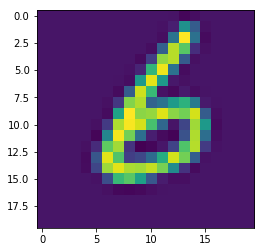

In [126]:
#test and predich a random ditit
def randomPredict():
    random_digit = np.random.randint(0, X.shape[0])
    print(f"Prediction: {predict(h)[random_digit]}")
    
    plt.imshow(X[random_digit].reshape((20, 20), order="F"))
          
randomPredict()

2703